In [2]:
import os
import cv2
import numpy as np

#for splitting the data into train/test sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tesor flow keras cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#plot images
import matplotlib.pyplot as plt

In [3]:
folder_dir="C:\\Users\\Biancaa. R\\Downloads\\cluster\\cluster_qt\\screen\\images"

In [4]:
data=[]
label=[]
SIZE=128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg") or file.endswith("png"):
            label.append(folder) 
            #for saving what all classes we are having
            img=cv2.imread(os.path.join(folder_dir,folder,file))
            img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            im=cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue


In [5]:
#data is saved as unsigned 8 bit integer
'''uint: This is short for "unsigned integer." "Unsigned" means that the data type represents only non-negative numbers (zero and positive values). In contrast, a signed integer can represent both positive and negative numbers.

"8": This refers to the number of bits used to store the value. With 8 bits, you can represent 2^8 = 256 different values, which is why uint8 can represent values from 0 to 255.'''
data[0]

array([[[241, 255, 255],
        [241, 255, 255],
        [241, 255, 255],
        ...,
        [241, 255, 255],
        [241, 255, 255],
        [241, 255, 255]],

       [[241, 255, 255],
        [241, 255, 255],
        [241, 255, 255],
        ...,
        [241, 255, 255],
        [241, 255, 255],
        [241, 255, 255]],

       [[241, 255, 255],
        [241, 255, 255],
        [241, 255, 255],
        ...,
        [241, 255, 255],
        [241, 255, 255],
        [241, 255, 255]],

       ...,

       [[241, 255, 255],
        [241, 255, 255],
        [241, 255, 255],
        ...,
        [241, 255, 255],
        [241, 255, 255],
        [241, 255, 255]],

       [[241, 255, 255],
        [241, 255, 255],
        [241, 255, 255],
        ...,
        [241, 255, 255],
        [241, 255, 255],
        [241, 255, 255]],

       [[241, 255, 255],
        [241, 255, 255],
        [241, 255, 255],
        ...,
        [241, 255, 255],
        [241, 255, 255],
        [241, 255, 255]]

In [6]:
data_arr=np.array(data)
label_arr=np.array(label)


In [6]:
encoder=LabelEncoder()
y=encoder.fit_transform(label_arr)
y=to_categorical(y,5) #becaue we have 5 different categories
x=data_arr/255
x[0]

array([[[0.92156863, 0.89803922, 0.83529412],
        [0.90980392, 0.88235294, 0.81176471],
        [0.9254902 , 0.89803922, 0.83529412],
        ...,
        [0.60392157, 0.45098039, 0.22745098],
        [0.57647059, 0.41960784, 0.18039216],
        [0.63921569, 0.49019608, 0.24313725]],

       [[0.91372549, 0.88627451, 0.82352941],
        [0.89803922, 0.87058824, 0.8       ],
        [0.91372549, 0.88627451, 0.81568627],
        ...,
        [0.63137255, 0.49411765, 0.28235294],
        [0.50980392, 0.36862745, 0.18039216],
        [0.58039216, 0.44705882, 0.20392157]],

       [[0.90588235, 0.8745098 , 0.83137255],
        [0.90196078, 0.8745098 , 0.80392157],
        [0.88627451, 0.85882353, 0.78823529],
        ...,
        [0.65490196, 0.49803922, 0.22352941],
        [0.70980392, 0.56078431, 0.30196078],
        [0.63529412, 0.49019608, 0.21176471]],

       ...,

       [[0.60784314, 0.45882353, 0.13333333],
        [0.61960784, 0.47058824, 0.1372549 ],
        [0.65882353, 0

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [8]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [9]:
datagen = ImageDataGenerator(
        rotation_range=50,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

In [10]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=8
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1)

C:\Users\Biancaa. R\AppData\Local\Temp\ipykernel_12892\2020909439.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/8



98/98 [==============================] - 195s 2s/step - loss: 1.2719 - accuracy: 0.4826 - val_loss: 1.3854 - val_accuracy: 0.5418
Epoch 2/8
98/98 [==============================] - 204s 2s/step - loss: 1.0705 - accuracy: 0.6168 - val_loss: 1.1513 - val_accuracy: 0.6474
Epoch 3/8
98/98 [==============================] - 172s 2s/step - loss: 0.8346 - accuracy: 0.7268 - val_loss: 0.7060 - val_accuracy: 0.7580
Epoch 4/8
98/98 [==============================] - 209s 2s/step - loss: 0.7830 - accuracy: 0.7413 - val_loss: 0.7835 - val_accuracy: 0.7516
Epoch 5/8
98/98 [==============================] - 171s 2s/step - loss: 0.7421 - accuracy: 0.7516 - val_loss: 0.8986 - val_accuracy: 0.7272
Epoch 6/8
98/98 [==============================] - 194s 2s/step - loss: 0.6745 - accuracy: 0.7745 - val_loss: 0.6874 - val_accuracy: 0.7658
Epoch 7/8
98/98 [==============================] - 191s 2s/step - loss: 0.6119 - accuracy: 0.7960 - val_loss: 0.9565 - val_accuracy: 0.7246
Epoch 8/8
98/98 [=============

25/25 [==============================] - 8s 330ms/step


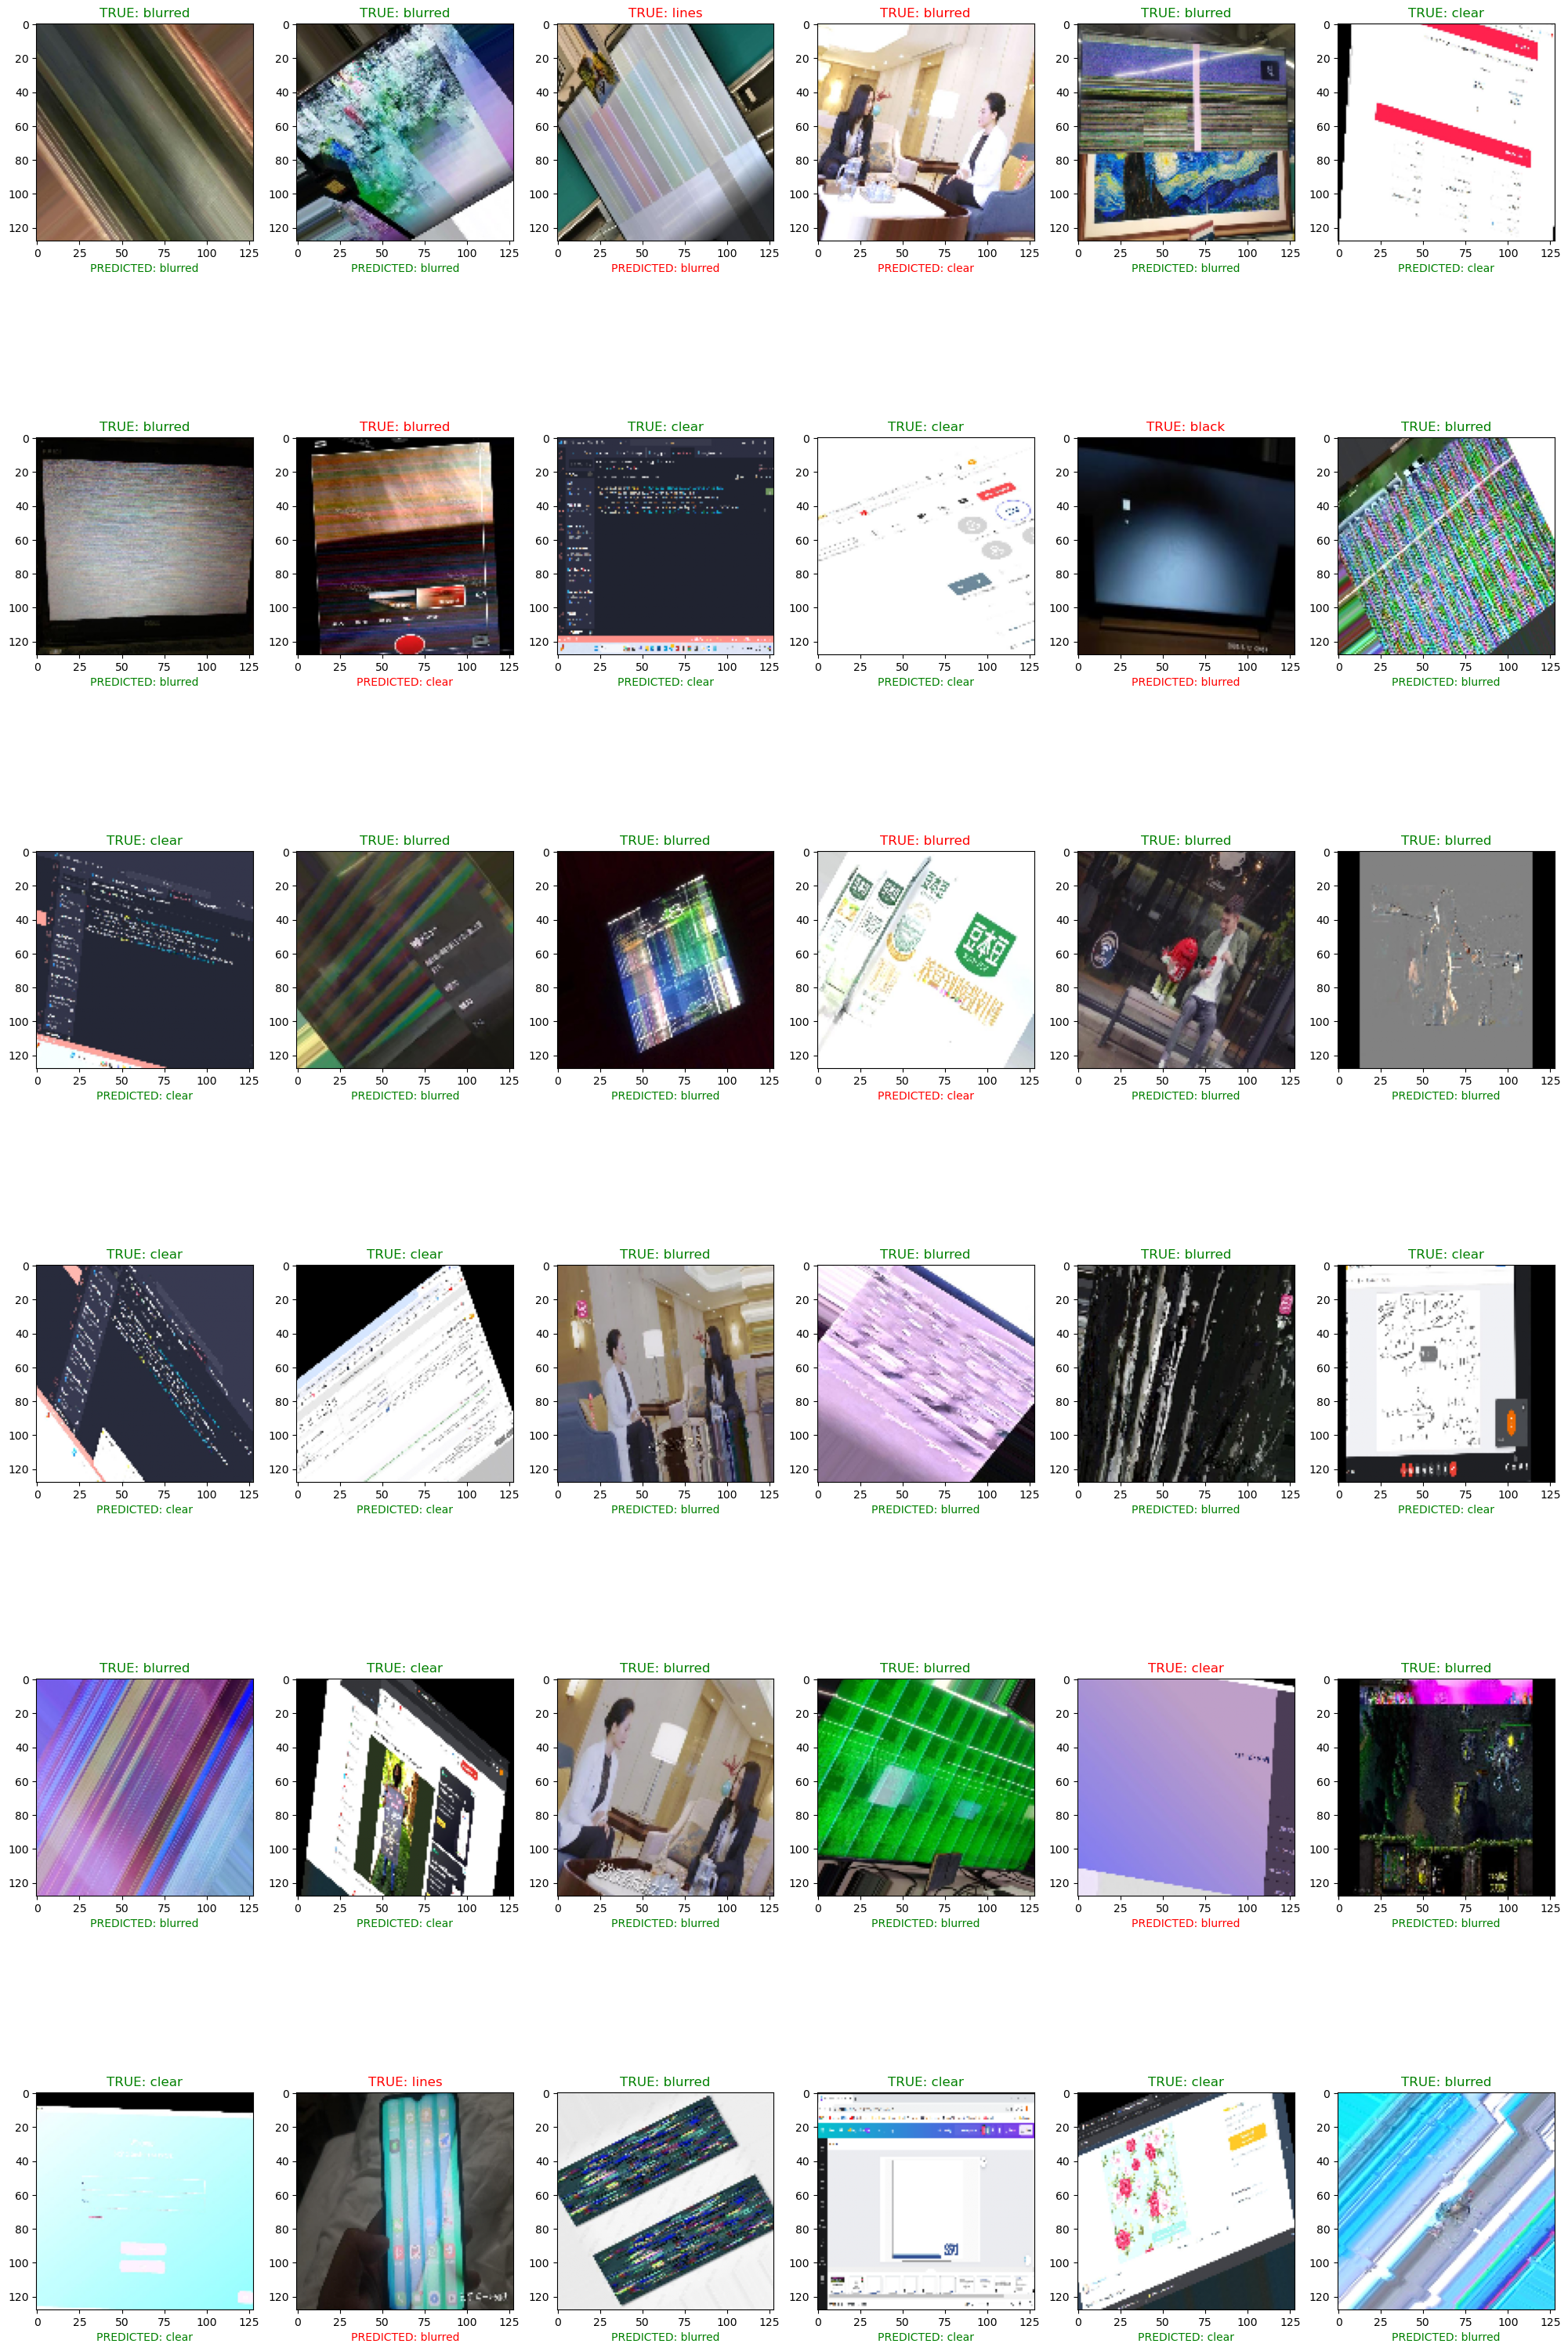

In [11]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [12]:
# save the model
model.save('model1.h5')
#the prev epoch took 304 mins 40 s
# this epoch took 304 mins 38 sec

d:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from tensorflow import keras
model=keras.models.load_model("model1.h5")

img=cv2.imread("C:\\Users\\Biancaa. R\\Downloads\\cluster\\cluster_qt\\screen\\images\\blurred\\4fb8c410-1b3c-4c0a-a453-b342db1b0ed3_jpeg.rf.f86d26ad1b15f5d5dd9fe58b3e563fa7.jpg")
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im=cv2.resize(img_rgb,(SIZE,SIZE))
data=[]
data.append(im)

data_arr=np.array(data)
data_arr=data_arr/255
print(len(data_arr))
#print(data_arr[0])

print(categories[np.argmax(model.predict(data_arr))])


1


1/1 [==============================] - 0s 104ms/step
clear


In [17]:
path=r"C:\Users\Biancaa. R\Downloads\cluster\cluster_qt\screen\images\blurred\-20230809-204622_jpg.rf.30e0aeec76d4dae526fed05d7207b2c1.jpg"
from tensorflow import keras
model=keras.models.load_model("model1.h5")

img=cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im=cv2.resize(img_rgb,(SIZE,SIZE))
data=[]
data.append(im)

data_arr=np.array(data)
data_arr=data_arr/255
print(len(data_arr))
#print(data_arr[0])

print(categories[np.argmax(model.predict(data_arr))])

1


1/1 [==============================] - 0s 136ms/step
blurred


In [15]:
path="C:\\Users\\Biancaa. R\\Downloads\\cluster\\cluster_qt\\screen\\images\\black\\8d8e558b-39f7-4bdb-b72b-2dcc23ad39d1.png"
from tensorflow import keras
model=keras.models.load_model("model1.h5")

img=cv2.imread(path)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im=cv2.resize(img_rgb,(SIZE,SIZE))
data=[]
data.append(im)

data_arr=np.array(data)
data_arr=data_arr/255
print(len(data_arr))
#print(data_arr[0])

print(categories[np.argmax(model.predict(data_arr))])


1
1/1 [==============================] - 0s 167ms/step
black


In [1]:
from tensorflow import lite,keras
#converter =lite.TFliteConverter.from_keras_model(model)
model=keras.models.load_model("model1.h5")
converter = lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [lite.OpsSet.TFLITE_BUILTINS, lite.OpsSet.SELECT_TF_OPS]
# Converting a SavedModel to a TensorFlow Lite model.
#converter = lite.TFLiteConverter.from_saved_model("C:\\Users\\Biancaa. R\\lumin_eye\\model1.h5")
tflite_model = converter.convert()
#converter.optimizations = [lite.Optimize.DEFAULT]
#tflite_model = converter.convert()
F=open('model1.tflite','wb')
F.write(tflite_model)
F.close()




INFO:tensorflow:Assets written to: C:\Users\BIANCA~1.R\AppData\Local\Temp\tmpazgazn0l\assets


INFO:tensorflow:Assets written to: C:\Users\BIANCA~1.R\AppData\Local\Temp\tmpazgazn0l\assets


In [11]:
categories = np.sort(os.listdir(folder_dir))
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model1.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
path="C:\\Users\\Biancaa. R\\Downloads\\cluster\\cluster_qt\\screen\\images\\black\\8d8e558b-39f7-4bdb-b72b-2dcc23ad39d1.png"
img=cv2.imread(path)
img = np.float32(img)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im=cv2.resize(img_rgb,(SIZE,SIZE))
data=[]
data.append(im)

data_arr=np.array(data)
data_arr=data_arr/255
print(len(data_arr))
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], data_arr)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print(categories[np.argmax(output_data)])

1
[[0.90980965 0.04480506 0.01491272 0.0152724  0.01520012]]
black
